In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

---

### `Erosion`
> * `Erosion is commonly used for processing binary images.` 
> * `It involves shrinking or thinning objects in an image and is particularly useful for removing small-scale noise, separating objects that are touching, and shrinking objects.`

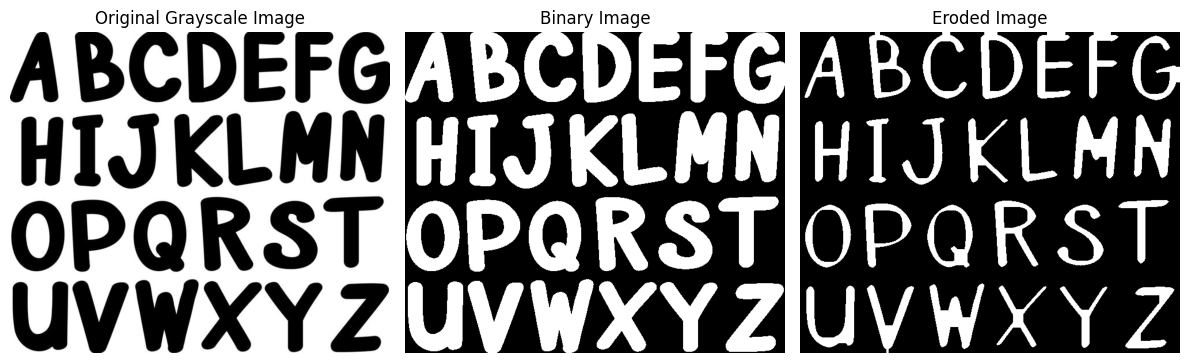

In [2]:
# Load the image
gray_image = cv2.imread('./alphabet.jpg', cv2.IMREAD_GRAYSCALE)

# Convert to binary image using thresholding -> Assuming text is darker than the background
_, binary_image = cv2.threshold(src=gray_image, thresh=128, maxval=255, type=cv2.THRESH_BINARY_INV)

# Define the structuring elements
kernel_5 = np.ones((5, 5), np.uint8)
# Or
kernel_15 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))  # Morphological Operation
kernel_35 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (35, 35))
kernel_48 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (48, 48))


# Perform erosion
eroded_image = cv2.erode(src=binary_image, kernel=kernel_5, iterations=3)

# Setup plot for visualization
plt.figure(figsize=(12, 6))

# Display original grayscale image
plt.subplot(1, 3, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

# Display binary image
plt.subplot(1, 3, 2)
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image')
plt.axis('off')

# Display eroded image
plt.subplot(1, 3, 3)
plt.imshow(eroded_image, cmap='gray')
plt.title('Eroded Image')
plt.axis('off')

plt.tight_layout()
plt.show()

---

### `Dilation`
> * `Dilation is a technique used in image processing to expand the areas of foreground objects in an image.` <br />
> * `It involves using a small grid, called a structuring element. ` <br />
> * `This is useful for making features in images clearer and more connected.`

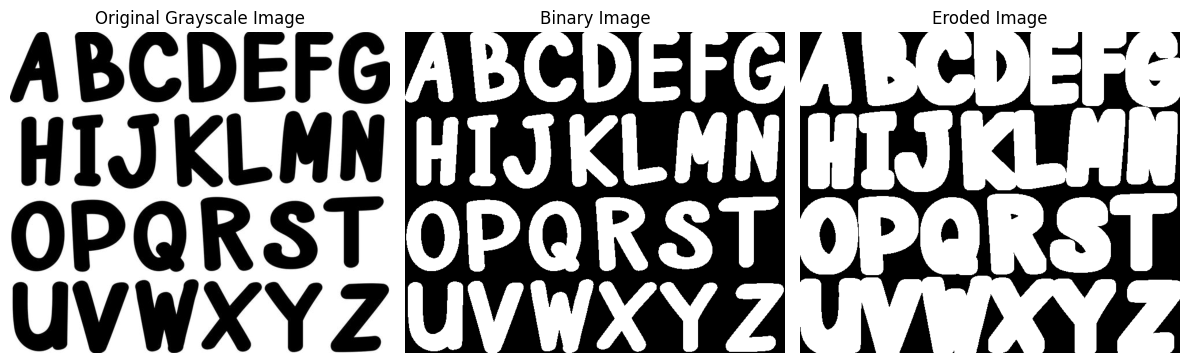

In [3]:
# Load the image
gray_image = cv2.imread('./alphabet.jpg', cv2.IMREAD_GRAYSCALE)

# Convert to binary image using thresholding -> Assuming text is darker than the background
_, binary_image = cv2.threshold(src=gray_image, thresh=128, maxval=255, type=cv2.THRESH_BINARY_INV)

# Define the structuring elements
kernel_5 = np.ones((5, 5), np.uint8)
# Or
kernel_15 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (15, 15))  # Morphological Operation
kernel_35 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (35, 35))
kernel_48 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (48, 48))


# Perform erosion
eroded_image = cv2.dilate(src=binary_image, kernel=kernel_5, iterations=3)

# Setup plot for visualization
plt.figure(figsize=(12, 6))

# Display original grayscale image
plt.subplot(1, 3, 1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

# Display binary image
plt.subplot(1, 3, 2)
plt.imshow(binary_image, cmap='gray')
plt.title('Binary Image')
plt.axis('off')

# Display eroded image
plt.subplot(1, 3, 3)
plt.imshow(eroded_image, cmap='gray')
plt.title('Eroded Image')
plt.axis('off')

plt.tight_layout()
plt.show()

----

### `Histogram Equalization`
> * `Histogram equalization is a technique used in image processing to improve the contrast in an image. ` <br />
> * `The goal is to obtain a uniform histogram for the output image which typically enhances the global contrast of the image.` <br />
> * `It makes the dark regions of the image darker and the bright regions brighter, which can help in bringing out details that were not visible before.`

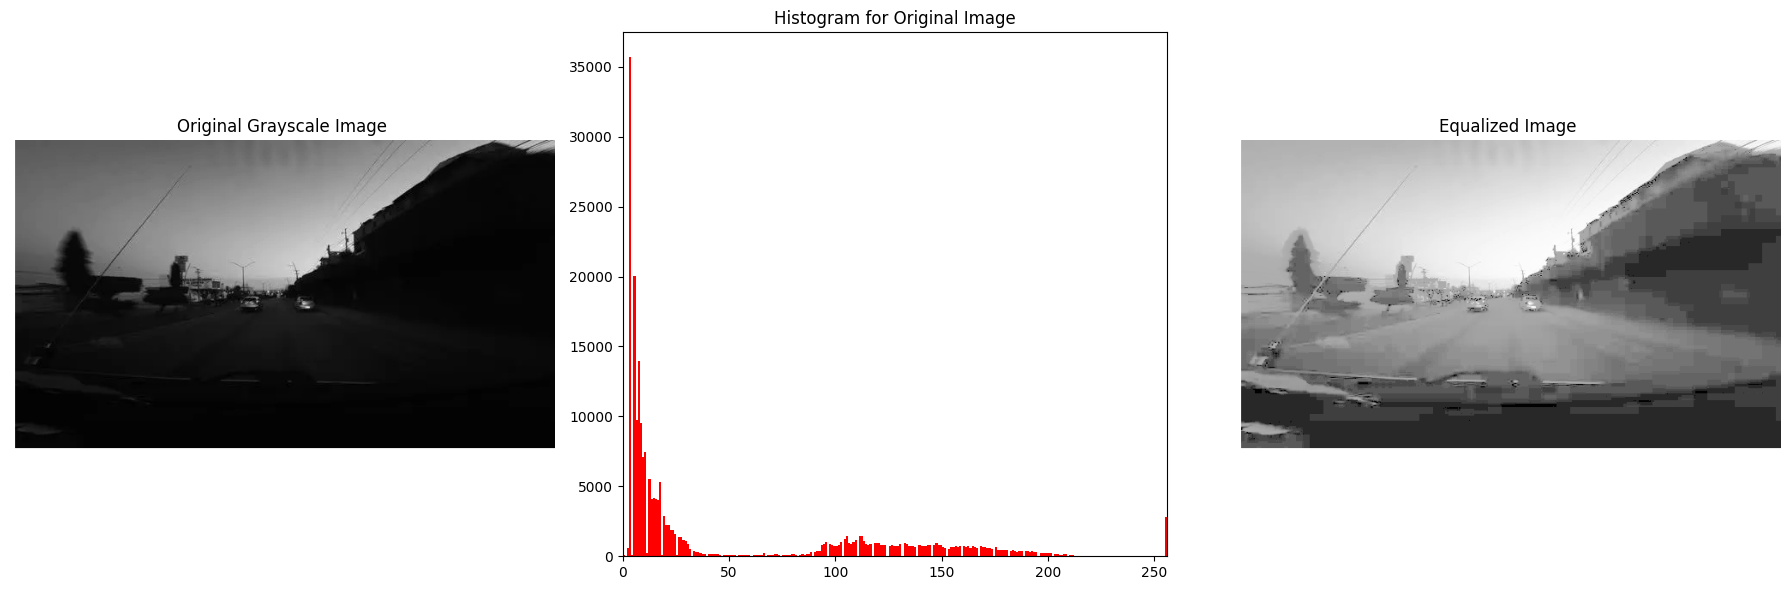

In [4]:
# Load the image
image = cv2.imread('./road.jpeg', cv2.IMREAD_GRAYSCALE)

# Apply histogram equalization
equalized_image = cv2.equalizeHist(image)

# Setup plot for visualization
plt.figure(figsize=(18, 6))

# Display original grayscale image
plt.subplot(1, 3, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Grayscale Image')
plt.axis('off')

# Display histogram for the original image
plt.subplot(1, 3, 2)
plt.hist(image.ravel(), bins=256, range=[0, 256], color='red')
plt.title('Histogram for Original Image')
plt.xlim([0, 256])

# Display equalized image
plt.subplot(1, 3, 3)
plt.imshow(equalized_image, cmap='gray')
plt.title('Equalized Image')
plt.axis('off')

plt.tight_layout()
plt.show()

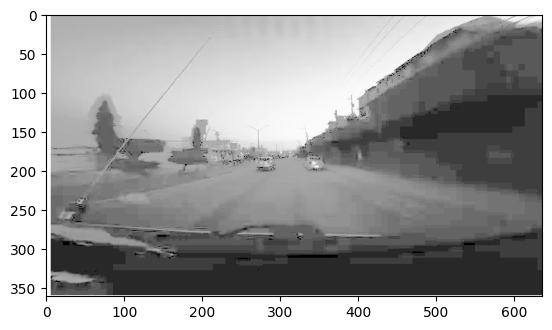

In [5]:
## Under the hood
def histogram_equalization(image):
    
    image = np.asarray(image)
    # Finding histogram
    histogram, _ = np.histogram(image, bins=256, density=True, range=[0, 256])
    # Performing Histogram Equalization
    cdf = np.cumsum(histogram)
    image = cdf[image] * 255   # values of image as indecies in CDF
    return image.astype('int')

# Call function
out = histogram_equalization(image=image)
plt.imshow(out, cmap='gray')

----

* Background Subtraction
* Basic image Arithmetic
* Put one image on another background.
* Put green image on forest background - Usage of changing color by HSV.
* Grab Cut Foreground
* Identify color.